# Figure 1 Plot code
## Importing libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import xarray as xr
from lmfit.models import ConstantModel, VoigtModel

from src.general.data_handling import load_dataset_from_data, save_figure
from src.general.plotting import *

CALIBRATION_CORRECTION_NM = 0.029096086906520213
SPEED_OF_LIGHT_VACUUM = 2.998e8
N_AIR = 1.00027679232

## Loading datasets
The datasets for experimental work in our group are saved as .hdf5 files and using these functions, this file can be converted into an Xarray Dataset (https://docs.xarray.dev/en/stable/generated/xarray.Dataset.html). This xarray dataset contains DataArrays (https://docs.xarray.dev/en/stable/generated/xarray.DataArray.html) which hold the information about the measurement/simulation. In this case, I load three datasets: `ds_spectrum` for the first subfigure and `ds_ple_pol1` and `ds_ple_pol2` for the second subfigure. The datasets then get modified in the respective cells corresponding to those subfigures.

In [2]:
ds_spectrum = load_dataset_from_data('results/figure1', 'spectrum')
ds_ple_pol1 = load_dataset_from_data('results/figure1', 'long_range_ple_pol1')
ds_ple_pol2 = load_dataset_from_data('results/figure1', 'long_range_ple_pol2')

## Subfigure 1a

### Reconfiguring the dataset

In [3]:
ds_spectrum['wavelength_corrected'] = N_AIR * ds_spectrum.wavelength + CALIBRATION_CORRECTION_NM
ds_spectrum = ds_spectrum.swap_dims({'wavelength': 'wavelength_corrected'})
ds_spectrum['intensity_normalized'] = (ds_spectrum.intensity - ds_spectrum.intensity.min()) / (ds_spectrum.intensity.max() - ds_spectrum.intensity.min())
ds_spectrum.intensity_normalized.attrs = {
    "long_name": "Normalized intensity",
    "units": "a.u."
}

### Fitting

In [ ]:
count_rate = ds_spectrum.intensity_normalized
wavelengths = ds_spectrum.wavelength_corrected

peak1 = VoigtModel(prefix="peak1_")
peak2 = VoigtModel(prefix="peak2_")

params = peak1.guess(count_rate.sel(wavelength_corrected=slice(618.9, 619.6)).values, x=wavelengths.sel(wavelength_corrected=slice(618.9, 619.6)).values)
params.update(peak2.guess(count_rate.sel(wavelength_corrected=slice(620, 620.6)).values, x=wavelengths.sel(wavelength_corrected=slice(620, 620.6)).values))

total_model = peak1 + peak2
fit_result = total_model.fit(count_rate.sel(wavelength_corrected=slice(618.7, 620.5)).values, params, x=wavelengths.sel(wavelength_corrected=slice(618.7, 620.5)).values)

### Plotting & Saving

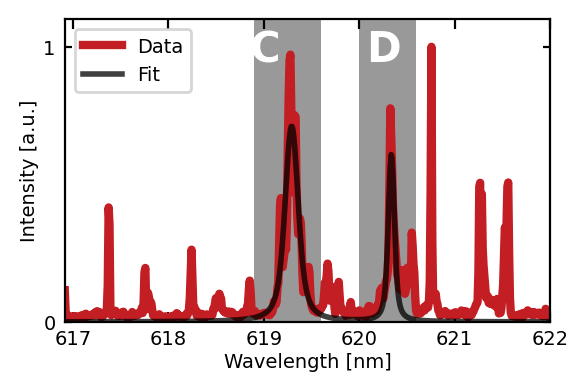

In [ ]:
fig, ax = plt.subplots(figsize=(75*MM, 50 * MM))
ax.set_ylim(0.2, 1.1)
ax.fill_between([618.9, 619.6], -1, 2, color="grey", alpha=0.8, edgecolor="none")
ax.fill_between([620, 620.6], -1, 2, color="grey", alpha=0.8, edgecolor="none")
ds_spectrum.intensity_normalized.plot(ax=ax, label='Data', c=RED_TINTS[0], lw=3)
ax.plot(ds_spectrum.wavelength_corrected.values, fit_result.eval(x=wavelengths.values), label="Fit", c="k", lw=2, zorder=100, alpha=0.75)
ax.set_xlim(616.92, 622)
ax.text(0.38, 0.97, f"C", transform=ax.transAxes, ha="left", va="top", fontsize=15, color="white", fontweight="bold")
ax.text(0.62, 0.97, f"D", transform=ax.transAxes, ha="left", va="top", fontsize=15, color="white", fontweight="bold")
ax.set_yticks([0, 1])
ax.set_xlabel("Wavelength [nm]")
ax.set_ylabel("Intensity [a.u.]")
ax.legend(loc="upper left")
fig.tight_layout()

save_figure(fig, 1, "spectrum", transparent=False) # This function saves the fig as a .svg file in the subfigures/figure1 folder as spectrum.svg

## Subfigure 1b

### Reconfiguring the dataset

In [5]:
ds_ple_pol1['count_rate_normalized'] = ds_ple_pol1.count_rate / ds_ple_pol1.count_rate.max()
ds_ple_pol2['count_rate_normalized'] = ds_ple_pol2.count_rate / ds_ple_pol1.count_rate.max()

ds_ple_pol1.count_rate_normalized.attrs = {
    "long_name": "Normalized count rate",
    "units": "a.u."
}
ds_ple_pol2.count_rate_normalized.attrs = {
    "long_name": "Normalized count rate",
    "units": "a.u."
}
ds_ple_pol1.frequency.attrs = {
    "long_name": "Frequency",
    "units": "GHz + 484 THz"
}
ds_ple_pol2.frequency.attrs = {
    "long_name": "Frequency",
    "units": "GHz + 484 THz"
}

### Plotting & Saving

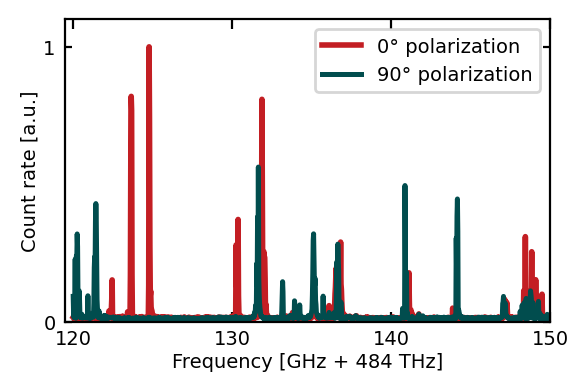

In [6]:
fig, ax = plt.subplots(figsize=(75*MM, 50 * MM))
ds_ple_pol1.count_rate_normalized.plot(ax=ax, c=RED_TINTS[0], lw=2, label="0° polarization")
ds_ple_pol2.count_rate_normalized.plot(ax=ax, c=RED_TINTS[-1], alpha=1, lw=1.8, label="90° polarization")
ax.set_title("")
ax.set_xlim(119.5, 150)
ax.set_ylim(0, 1.1)
ax.set_yticks([0, 1])
ax.set_xticks([120, 130, 140, 150])
ax.set_ylabel("Count rate [a.u.]")
ax.legend()
fig.tight_layout()

save_figure(fig, 1, "long_range_ple", transparent=False) # This function saves the fig as a .svg file in the subfigures/figure1 folder as long_range_ple.svg

## Upload the new figures to Overleaf
The function in this cell uploads the svg file in *figures/results/figure1* to Overleaf in the form of a .pdf file. The figure also gets exported into a .pdf and .png file within the *figures/results/figure1* folder. Crucially, you don't need to have Inkscape running to export the current version of the figure!

In [18]:
from src.general.data_handling import update_combined_figure

update_combined_figure(1)